# Assignment 5

In [18]:
# imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
import graphviz 
from IPython.display import Image

In [2]:
data = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2019-11-09/visualisations/listings.csv')
data = data.dropna()
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,39790142,Habitación privada con baño propio,305871088,Gaston,Eixample,la Dreta de l'Eixample,41.39043,2.16171,Private room,35,1,1,2019-11-07,1.00,1,89
20189,39802148,A Good Deal,36027643,Maz,Eixample,la Dreta de l'Eixample,41.39018,2.16329,Private room,32,1,1,2019-11-03,1.00,2,277
20219,39830187,Habitación doble,294344510,Barbara Kimberly,Les Corts,les Corts,41.39083,2.13966,Private room,40,1,1,2019-11-05,1.00,1,363
20265,39864550,Habitación en piso acogedor y barrio encantador,134152396,Diana,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,41.39783,2.14128,Private room,25,1,2,2019-11-05,2.00,1,11


## Exercise 1

In [3]:
Y = data[["price"]]
# calculate mean and standard deviation to be able to divide data into price categories
mean = Y.mean()
stdev = Y.std()
mean-stdev # it doesn't really make sense to take the really_cheap category which is a price under zero right?

price   -281.521559
dtype: float64

In [4]:
# divide apartments into price categories

# calculate thresholds to be able to divide data
really_cheap_upper = mean - stdev
cheap_upper = mean 
expensive_upper = mean + stdev

Y_categories = Y.copy() # Y_categories is later used for the classifier fit
# store the category for each apartment in Y_categories
Y_categories[Y <= really_cheap_upper] = 'really cheap'
Y_categories[(Y > really_cheap_upper) & (Y <= cheap_upper)] = 'cheap'
Y_categories[(Y > cheap_upper) & (Y <= expensive_upper)] = 'expensive'
Y_categories[(Y > expensive_upper)] = 'really expensive'


# count the number of apartments in each category
print(Y_categories['price'].value_counts())
# there are no really cheap apartments -> count is zero

cheap               12895
expensive            2948
really expensive      289
Name: price, dtype: int64


## Exercise 2

In [5]:
# get data for all the features that we are looking at
X = data[['neighbourhood_group',
         'neighbourhood',
         'latitude',
         'longitude',
         'room_type',
         'minimum_nights',
         'number_of_reviews',
         'reviews_per_month',
         'availability_365']]
# encode features as categorical variables --> getting numerical values for each category
X['room_type'] = pd.factorize(X['room_type'])[0]
X['neighbourhood_group'] = pd.factorize(X['neighbourhood_group'])[0]
X['neighbourhood'] = pd.factorize(X['neighbourhood'])[0]
# each feature is scaled to a value from 0 to 1 
X = MinMaxScaler().fit_transform(X)

C:\Users\Annika\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Annika\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Annika\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [17]:
# create the decision tree classifier and export the output tree with graphviz
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y_categories)
#tree.export_graphviz(clf, max_depth=3, out_file='tree.out')

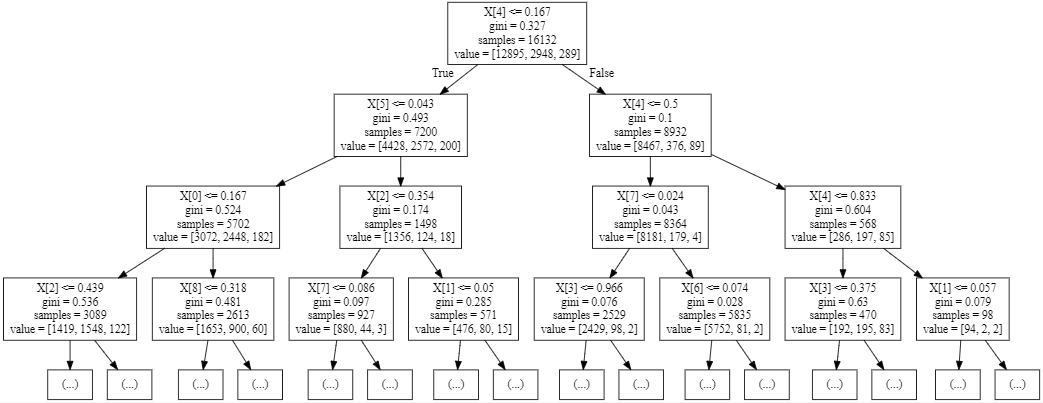

In [21]:
# importing an image file for the exported dot file from graphviz
img = 'tree.png'
Image(filename=img)

In [22]:
# print importances of each feature
print(clf.feature_importances_)

[0.02260048 0.03816615 0.14994606 0.13759434 0.2019099  0.10234573
 0.09624011 0.12336979 0.12782744]


We can see that the most important feature to classify the apartments according to price categories is the roomtype (X4). The next important features are latitude and longitude as well as availability_365. Not as important on the other hand are neighbourhood_group and neighbourhood --> price categories doesn't seem to depend that much on neighbourhoods, but still on latitude and longitude --> maybe neighbourhoods and neighbourhood_groups are too big areas that contain multiple price categories, but the price category is still depending on the location 

## Exercise 3

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# classifier with price categories
clf = RandomForestClassifier(oob_score=True)
clf.fit(X, Y_categories)

print('Score: ', clf.oob_score_)


C:\Users\Annika\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.8596578229605752


In [28]:
# classifier with numerical price
regr  = RandomForestRegressor(oob_score=True)
regr.fit(X, Y)

print('Score: ', regr.oob_score_)

C:\Users\Annika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Score:  0.40647264628622615


The Score of the Random forest classifier with price categories is around 86% while the regressor random forest with numerical price is much lower: just around 41%. For the regression classifier price classes have a much larger price range which is harder to predict which could explain the lower score. 